In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

# 生成棋盘状的图片A和B，其中A和B错列
白色值为0，黑色值为1，若使用公式

$$d=\frac{1}{n^2}\left |\Sigma{A_{i,j}-B_{i,j}} \right |$$

计算图片A和B的距离，每个像素点上的A和B差值均为1，距离$d=1$。在此定义下，再也找不出两张图片距离更远了。

In [2]:
n = 8
A = np.zeros([n,n])
B = np.zeros([n,n])
A[::2,::2]=1
A[1::2,1::2]=1
B[1::2,::2]=1
B[::2,1::2]=1

图片A1和B1距离为 [1.]


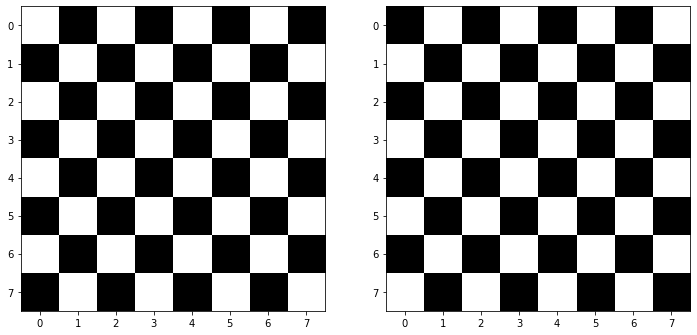

In [3]:
plt.subplot(121)
plt.imshow(A,cmap='gray', vmin=0, vmax=1)
plt.subplot(122)
plt.imshow(B,cmap='gray', vmin=0, vmax=1)
d = np.sum(np.abs(A-B))  / np.shape(A[0]) / np.shape(A[1])
print("图片A1和B1距离为",d)

# 进行卷积操作
使用简单的平均卷积核进行卷积操作

$$s_{1_{i,j}} = \frac{1}{9} \Sigma_{i-1}^{i+1}\Sigma_{j-1}^{j+1}s_{i,j}$$

不考虑边缘像素的卷积操作，则每次积过后，图片两个方向维度各减少2。

图片A1和B1距离为 [0.11111111]


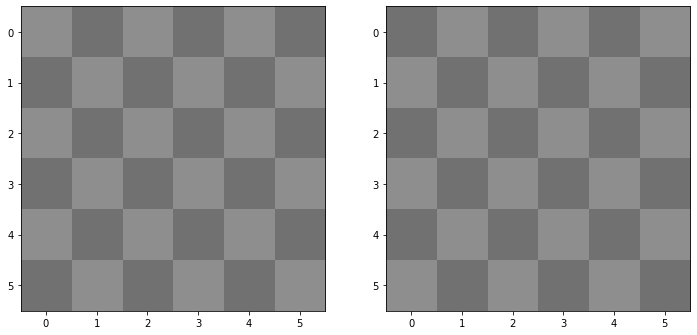

In [4]:
A1 = 1/9*(A[:-2,:-2]+A[:-2,1:-1]+A[:-2,2:] + A[1:-1,:-2]+A[1:-1,1:-1]+A[1:-1,2:] + A[2:,:-2]+A[2:,1:-1]+A[2:,2:])
B1 = 1/9*(B[:-2,:-2]+B[:-2,1:-1]+B[:-2,2:] + B[1:-1,:-2]+B[1:-1,1:-1]+B[1:-1,2:] + B[2:,:-2]+B[2:,1:-1]+B[2:,2:])
plt.subplot(121)
plt.imshow(A1,cmap='gray', vmin=0, vmax=1)
plt.subplot(122)
plt.imshow(B1,cmap='gray', vmin=0, vmax=1)
d = np.sum(np.abs(A1-B1)) / np.shape(A1[0]) / np.shape(A1[1])
print("图片A1和B1距离为",d)

# 再进行一次卷积操作
图片两个方向维度各减少2，距离再一次减小

图片A2和B2距离为 [0.01234568]


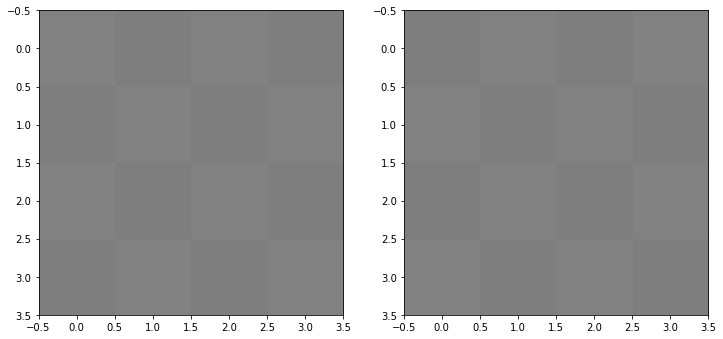

In [5]:
A2 = 1/9*(A1[:-2,:-2]+A1[:-2,1:-1]+A1[:-2,2:] + A1[1:-1,:-2]+A1[1:-1,1:-1]+A1[1:-1,2:] + A1[2:,:-2]+A1[2:,1:-1]+A1[2:,2:])
B2 = 1/9*(B1[:-2,:-2]+B1[:-2,1:-1]+B1[:-2,2:] + B1[1:-1,:-2]+B1[1:-1,1:-1]+B1[1:-1,2:] + B1[2:,:-2]+B1[2:,1:-1]+B1[2:,2:])
plt.subplot(121)
plt.imshow(A2,cmap='gray', vmin=0, vmax=1)
plt.subplot(122)
plt.imshow(B2,cmap='gray', vmin=0, vmax=1)
d = np.sum(np.abs(A2-B2)) / np.shape(A2[0]) / np.shape(A2[1])
print("图片A2和B2距离为",d)

# 进行池化操作
使用简单的平均池化操作，即每个$2\times2$的像素块取平均值。

在这个特殊例子中，一次平均池化后，两张图片完全一样。

In [6]:
A3 = A.reshape(int(n/2),2,int(n/2),2).mean(axis=3).mean(axis=1)
B3 = B.reshape(int(n/2),2,int(n/2),2).mean(axis=3).mean(axis=1)

图片A2和B2距离为 [0.]


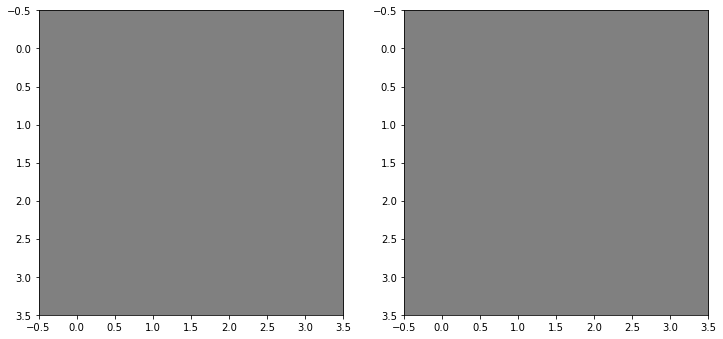

In [7]:
plt.subplot(121)
plt.imshow(A3,cmap='gray', vmin=0, vmax=1)
plt.subplot(122)
plt.imshow(B3,cmap='gray', vmin=0, vmax=1)
d = np.sum(np.abs(A3-B3)) / np.shape(A3[0]) / np.shape(A3[1])
print("图片A2和B2距离为",d)